In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
historical_info = pd.read_csv("D:/uni/DECISION MODELS/FINAL PROJECT/decision_model-master/historical_info.csv", sep = ";")
patients = pd.read_csv("D:/uni/DECISION MODELS/FINAL PROJECT/decision_model-master/patients2.csv", sep = "\t")

In [3]:
historical_info.head()

,Section,Date,time,patients
0,8000595,01/01/2015,12:00:00,7
1,8000595,02/01/2015,12:00:00,9
2,8000595,03/01/2015,12:00:00,8
3,8000595,04/01/2015,12:00:00,10
4,8000595,05/01/2015,12:00:00,12


In [4]:
patients.head()

,Patient_ID,Surgery_Type,Arrival_Date,Arrival Time,Section,Surgery_Time_min,POST_ANESTHESIA_CARE_UNIT_Time_min,Length_of_Stay_day
0,A-5000,Internal_Medicine,06/07/2015,11:00:00 PM,8000595,62.87,47.76,0
1,A-5001,Internal_Medicine,01/02/2015,5:00:00 AM,8000595,82.39,53.99,0
2,A-5002,Internal_Medicine,14/07/2015,11:00:00 PM,8000595,90.47,47.04,2
3,A-5003,Internal_Medicine,20/11/2015,7:00:00 PM,8000595,79.25,47.32,0
4,A-5004,Internal_Medicine,21/02/2015,11:00:00 AM,8000595,68.30,48.66,0


(array([3609.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         568.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

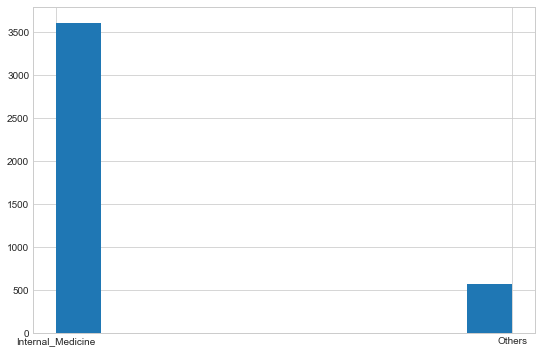

In [5]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize= (9,6))
plt.hist(patients["Surgery_Type"], range = (patients["Surgery_Type"].min(), patients["Surgery_Type"].max()))

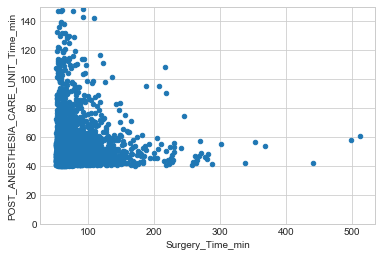

In [6]:
var = 'Surgery_Time_min'
data = pd.concat([patients['POST_ANESTHESIA_CARE_UNIT_Time_min'], patients[var]], axis=1)
data.plot.scatter(x=var, y='POST_ANESTHESIA_CARE_UNIT_Time_min', ylim=(0,150));

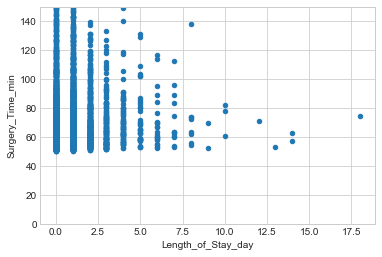

In [7]:
var = 'Length_of_Stay_day'
data = pd.concat([patients['Surgery_Time_min'], patients[var]], axis=1)
data.plot.scatter(x=var, y='Surgery_Time_min', ylim=(0,150));

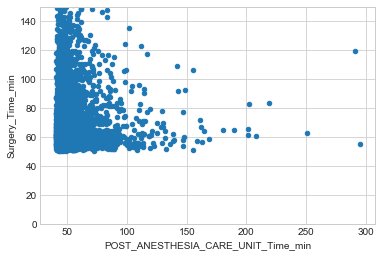

In [8]:
var = 'POST_ANESTHESIA_CARE_UNIT_Time_min'
data = pd.concat([patients['Surgery_Time_min'], patients[var]], axis=1)
data.plot.scatter(x=var, y='Surgery_Time_min', ylim=(0,150));

In [9]:
d = patients.groupby("Surgery_Type")["POST_ANESTHESIA_CARE_UNIT_Time_min"].mean()
d

Surgery_Type
Internal_Medicine    53.333910
Others               52.778574
Name: POST_ANESTHESIA_CARE_UNIT_Time_min, dtype: float64

In [10]:
d = patients.groupby("Surgery_Type")["POST_ANESTHESIA_CARE_UNIT_Time_min"].median()
d

Surgery_Type
Internal_Medicine    48.11
Others               47.91
Name: POST_ANESTHESIA_CARE_UNIT_Time_min, dtype: float64

In [11]:
f = patients.groupby("Surgery_Type")["Length_of_Stay_day"].mean()
f

Surgery_Type
Internal_Medicine    0.926018
Others               0.957746
Name: Length_of_Stay_day, dtype: float64

In [12]:
f = patients.groupby("Surgery_Type")["Length_of_Stay_day"].median()
f

Surgery_Type
Internal_Medicine    1
Others               1
Name: Length_of_Stay_day, dtype: int64

In [13]:
g = patients.groupby("Surgery_Type")["Surgery_Time_min"].mean()
g

Surgery_Type
Internal_Medicine    74.015143
Others               74.006549
Name: Surgery_Time_min, dtype: float64

In [14]:
g = patients.groupby("Surgery_Type")["Surgery_Time_min"].median()
g

Surgery_Type
Internal_Medicine    64.73
Others               65.57
Name: Surgery_Time_min, dtype: float64

LE MEDIE NON SI DISCOSTANO TROPPO DALLE MEDIANE, QUINDI NON CI DOVREBBERO ESSERE OUTLIER, A PARTE PER LA VARIABILE SURGERY_TIME_MIN

In [15]:
patients.groupby("Surgery_Type").aggregate(['min', np.median, np.average, max])

Surgery_Time_min                            \
                               min median    average     max   
Surgery_Type                                                   
Internal_Medicine            50.69  64.73  74.015143  512.74   
Others                       50.31  65.57  74.006549  337.44   

                  POST_ANESTHESIA_CARE_UNIT_Time_min                    \
                                                 min median    average   
Surgery_Type                                                             
Internal_Medicine                              40.15  48.11  53.333910   
Others                                         40.47  47.91  52.778574   

                          Length_of_Stay_day                       
                      max                min median   average max  
Surgery_Type                                                       
Internal_Medicine  295.31                  0      1  0.926018  18  
Others             180.66                  0      1  0.957746  14

(-0.5, 1.5, 0, 120)

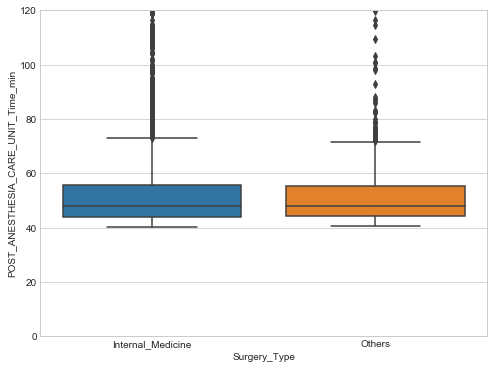

In [16]:
sns.set_style("whitegrid")
var = "Surgery_Type"
data = pd.concat([patients["POST_ANESTHESIA_CARE_UNIT_Time_min"], patients[var]], axis = 1)
f, ax = plt.subplots(figsize= (8,6))
fig = sns.boxplot(x = var, y = "POST_ANESTHESIA_CARE_UNIT_Time_min", data = data)
fig.axis(ymin = 0, ymax = 120)

In [17]:
import datetime

In [18]:
customdate = datetime.datetime(2015, 1, 1)
y = historical_info.patients.values
x = [customdate + datetime.timedelta(days=i) for i in range(len(y))]

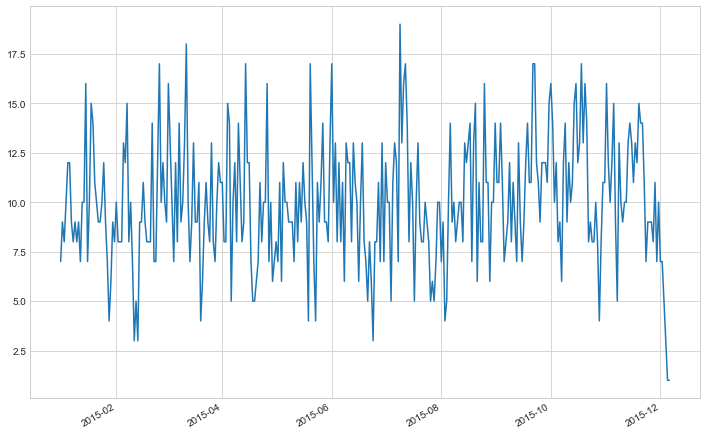

In [19]:
f, ax = plt.subplots(figsize= (12,8))
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder
cols = ("Surgery_Type", "Arrival_Date", "Arrival Time", "Section")

for i in cols:
    le = LabelEncoder()
    le.fit(list(patients[i].values))
    patients[i] = le.transform(list(patients[i].values))

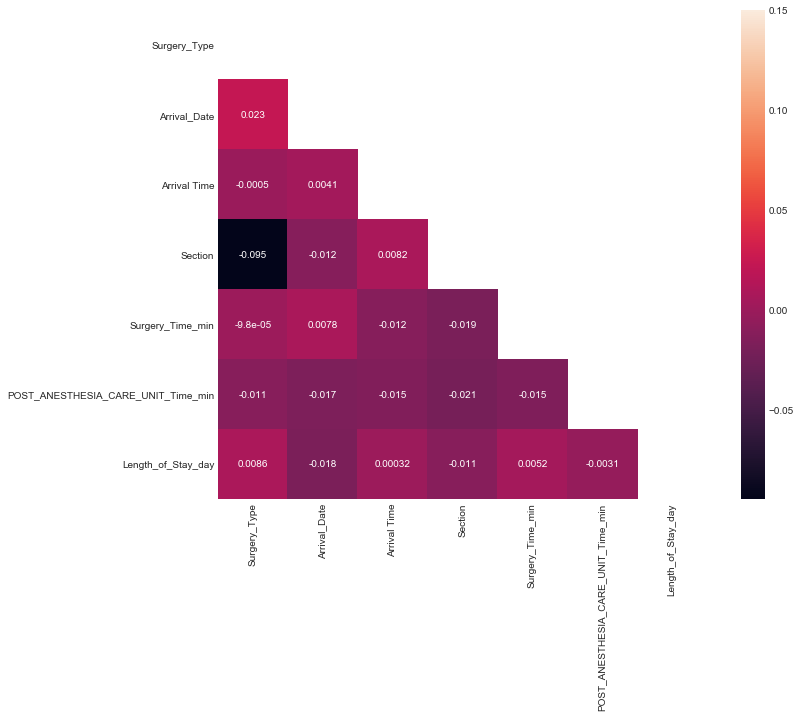

In [31]:
corrmat = patients.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corrmat, mask=mask, vmax= .15, annot = True, square=True)

SE PREFERITE L'AZZURRINO:D :

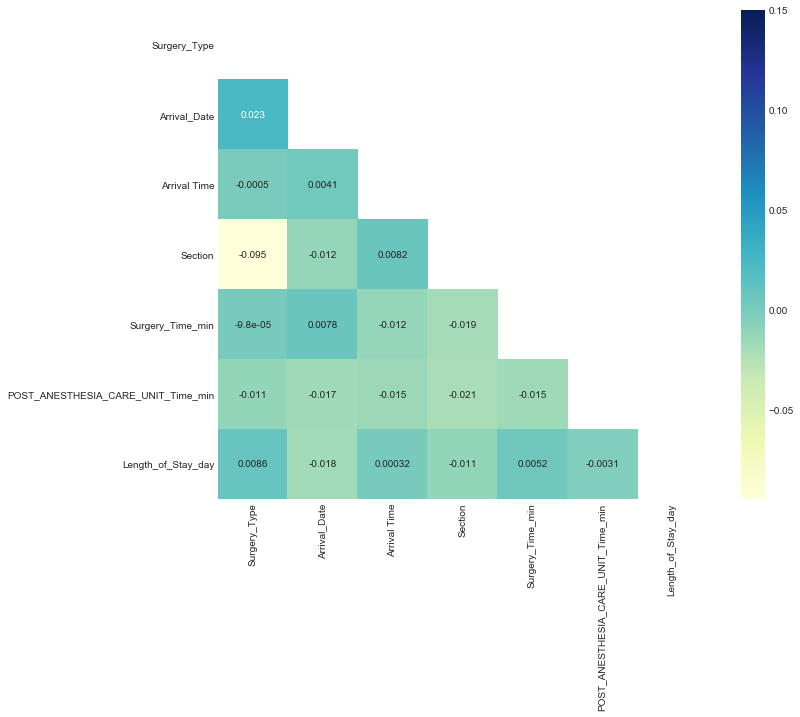

In [32]:
corrmat = patients.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corrmat, cmap="YlGnBu", mask=mask, vmax= .15, annot = True, square=True)